In [1]:
import sys
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

In [2]:
# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb, l, var):
    """Exponentiated quadratic  with l and σ^2"""
    sq_norm = -1/(2*l**2) * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return var*np.exp(sq_norm)

In [3]:
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
line_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

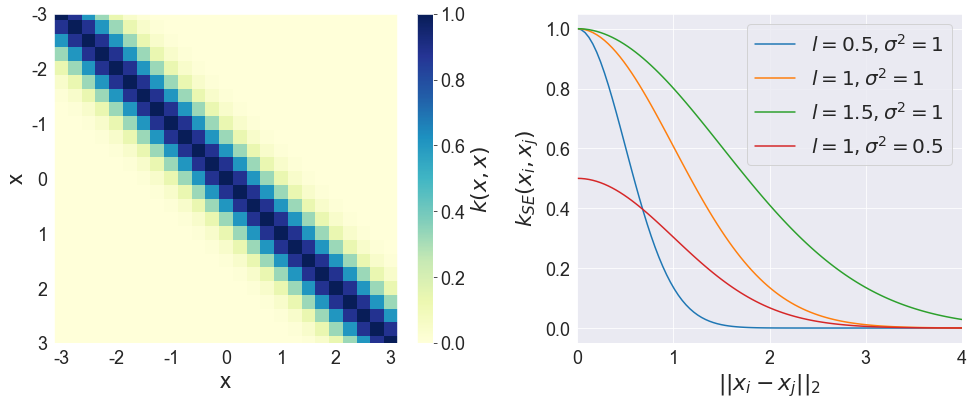

In [4]:
# Illustrate covariance matrix and function

# Show covariance matrix example from exponentiated quadratic
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
xlim = (-3, 3)
X = np.expand_dims(np.linspace(*xlim, 25), 1)
Σ = exponentiated_quadratic(X,X,0.5,1)
# Plot covariance matrix
im = ax1.imshow(Σ, cmap=cm.YlGnBu)
cbar = plt.colorbar(
    im, ax=ax1, fraction=0.045, pad=0.05)
cbar.ax.set_ylabel('$k(x,x)$', fontsize=22)
ax1.set_xlabel('x', fontsize=22)
ax1.set_ylabel('x', fontsize=22)
ticks = list(range(xlim[0], xlim[1]+1))
ax1.set_xticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_yticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_xticklabels(ticks,fontsize=18)
ax1.set_yticklabels(ticks,fontsize=18)
ax1.grid(False)

xlim = (0, 4)
X = np.expand_dims(np.linspace(*xlim, num=100), 1)

distance = scipy.spatial.distance.cdist(X, X, 'euclidean')
Σ1 = exponentiated_quadratic(X,X,0.5,1)
ax2.plot(distance[:,0], Σ1[:,0], label='$l=0.5, \sigma^2=1$')
Σ2 = exponentiated_quadratic(X,X,1,1)
ax2.plot(distance[:,0], Σ2[:,0], label='$l=1, \sigma^2=1$')
Σ3 = exponentiated_quadratic(X,X,1.5,1)
ax2.plot(distance[:,0], Σ3[:,0], label='$l=1.5, \sigma^2=1$')
Σ4 = exponentiated_quadratic(X,X,1,0.5)
ax2.plot(distance[:,0], Σ4[:,0], label='$l=1, \sigma^2=0.5$')
ax2.set_xlabel('$||x_i - x_j||_2$', fontsize=22)
ax2.set_ylabel('$k_{SE}(x_i,x_j)$', fontsize=22)
ax2.set_xlim(*xlim)
ax2.legend(loc=1, fontsize=20)
fig.tight_layout()
plt.show()
#

In [41]:
#SE convariance function with length scale = 0.5, variance = 1, both plots show that the covariance is high when the two points are close to each other, i.e, their pairwise distance is samll. We can see from the right plot, when their distance exceeds 1.50, the covariace becomes 0.

In [43]:
# SE covariance against pairwise distance for different combinations of parameters. When the length scale has larger value, function value decreases to 0 slowly. We can see from the lines that the signal variance acts like a scaling factor.

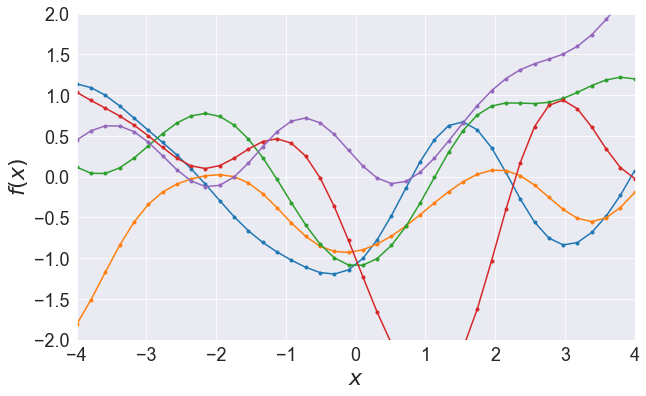

In [5]:
# Sample from the Gaussian process distribution
nb_of_samples = 40  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = exponentiated_quadratic(X, X,1,1)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Σ, 
    size=number_of_functions)

# Plot the sampled functions
plt.figure(figsize=(10, 6))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim([-4, 4])
plt.ylim([-2,2])
plt.show()
#

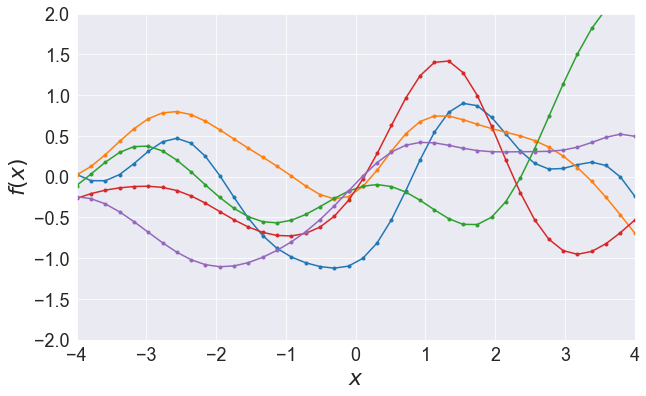

In [6]:
# Sample from the Gaussian process distribution
nb_of_samples = 40  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = exponentiated_quadratic(X, X,1,0.5)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Σ, 
    size=number_of_functions)

# Plot the sampled functions
plt.figure(figsize=(10, 6))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim([-4, 4])
plt.ylim([-2,2])
plt.show()
#

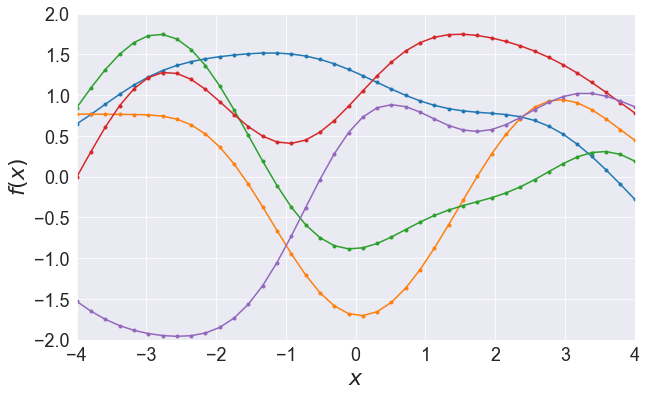

In [7]:
# Sample from the Gaussian process distribution
nb_of_samples = 40  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = exponentiated_quadratic(X, X,1.5,1)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Σ, 
    size=number_of_functions)

# Plot the sampled functions
plt.figure(figsize=(10, 6))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim([-4, 4])
plt.ylim([-2,2])
plt.show()
#

In [8]:
# this is the 5 different function realizations at 40 points sampled from the Gaussian prior, using $\boldsymbol{0}$ mean and SE covariance function with length scale = 1 and signal variance = 1. All the functions are smooth and infinitely differentiable. 

In [9]:
# Define Matern class  
def matern_3(xa, xb, l):
    """matern 3/2  with l"""
    # distance (Euclidian)
    ma_dist = np.sqrt(3)/l * scipy.spatial.distance.cdist(xa, xb, 'euclidean')
    return (1+ma_dist)*np.exp(-ma_dist)

def matern_5(xa, xb, l):
    """matern 5/2  with l"""
    # distance (Euclidian)
    ma_dist = np.sqrt(5)/l * scipy.spatial.distance.cdist(xa, xb, 'euclidean')
    return (1+ma_dist+np.square(ma_dist)/3)*np.exp(-ma_dist)

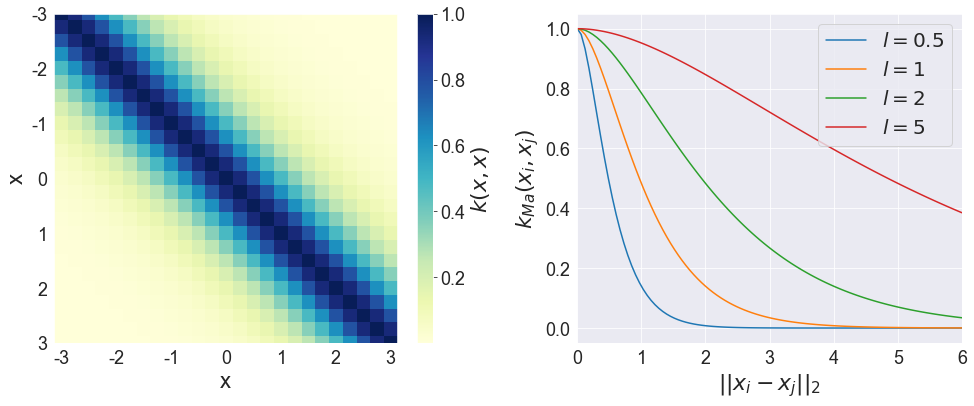

In [10]:
# Illustrate covariance matrix and function

# Show covariance matrix example from exponentiated quadratic
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
xlim = (-3, 3)
X = np.expand_dims(np.linspace(*xlim, 25), 1)
Σ = matern_3(X,X,1)
# Plot covariance matrix
im = ax1.imshow(Σ, cmap=cm.YlGnBu)
cbar = plt.colorbar(
    im, ax=ax1, fraction=0.045, pad=0.05)
cbar.ax.set_ylabel('$k(x,x)$')
ax1.set_xlabel('x')
ax1.set_ylabel('x')
ticks = list(range(xlim[0], xlim[1]+1))
ax1.set_xticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_yticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_xticklabels(ticks)
ax1.set_yticklabels(ticks)
ax1.grid(False)

xlim = (0, 6)
X = np.expand_dims(np.linspace(*xlim, num=100), 1)

#for i in range(number_of_functions):
distance = scipy.spatial.distance.cdist(X, X, 'euclidean')
Σ1 = matern_3(X,X,0.5)
ax2.plot(distance[:,0], Σ1[:,0], label='$l=0.5$')
Σ2 = matern_3(X,X,1)
ax2.plot(distance[:,0], Σ2[:,0], label='$l=1$')
Σ3 = matern_3(X,X,2)
ax2.plot(distance[:,0], Σ3[:,0], label='$l=2$')
Σ4 = matern_3(X,X,5)
ax2.plot(distance[:,0], Σ4[:,0], label='$l=5$')
ax2.set_xlabel('$||x_i - x_j||_2$')
ax2.set_ylabel('$k_{Ma}(x_i,x_j)$')
ax2.set_xlim([0, 6])
plt.legend(loc=1)
fig.tight_layout()
plt.show()

In [11]:
# matern 3/2 convariance function with length scale = 1.  

In [12]:
# Matern 3/2 covariance function with different length scales.  When the length scale has larger value, function value decreases to 0 slowly. 

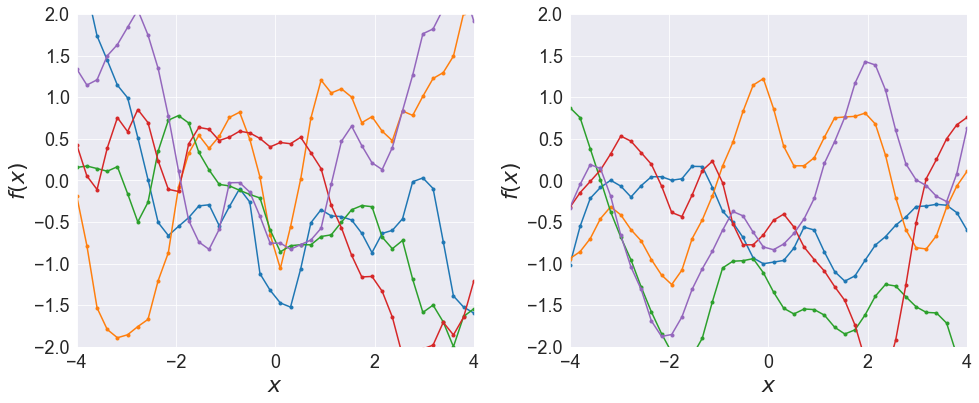

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
# Sample from the Gaussian process distribution
nb_of_samples = 40  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = matern_3(X,X,1)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Σ, 
    size=number_of_functions)

# Plot the sampled functions
for i in range(number_of_functions):
    ax1.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax1.set_xlim([-4, 4])
ax1.set_ylim([-2,2])

X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ2 = matern_5(X,X,1)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys2 = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Σ2, 
    size=number_of_functions)

# Plot the sampled functions
#plt.figure(figsize=(10, 6))
for i in range(number_of_functions):
    ax2.plot(X, ys2[i], linestyle='-', marker='o', markersize=3)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$f(x)$')
ax2.set_xlim([-4, 4])
ax2.set_ylim([-2,2])
fig.tight_layout()
plt.show()

In [14]:
# this is the 5 different function realizations at 40 points sampled from the Gaussian prior, using $\boldsymbol{0}$ mean and matern 3/2 covariance function with length scale = 0.5. The functions are not as smooth as we can get from the SE variance function.  

In [15]:
# 5 function realizations at 40 points sampled from Gaussian process prior using 0 mean and matern 5/3 covariance function. The functions are smoother than what we got from the matern 3/2.

In [26]:
# Define the exponentiated quadratic 
def gamma_exp(xa, xb, l, gamma=1.5):
    """Exponentiated quadratic  with l and gamma"""
    #distance (Euclidian)
    gammaexp_dist = 1/l * scipy.spatial.distance.cdist(xa, xb, 'euclidean')
    return np.exp(-np.power(gammaexp_dist, gamma))

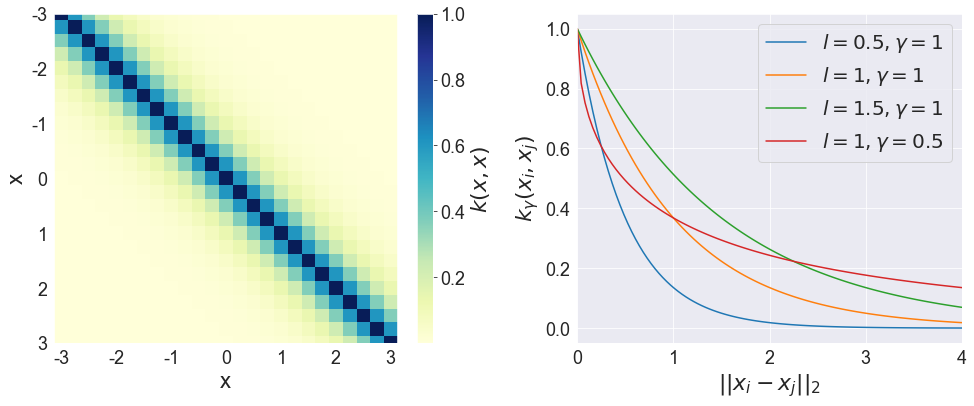

In [17]:
# Illustrate covariance matrix and function

# Show covariance matrix example from exponentiated quadratic
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
xlim = (-3, 3)
X = np.expand_dims(np.linspace(*xlim, 25), 1)
Σ = gamma_exp(X,X,0.5,1)
# Plot covariance matrix
im = ax1.imshow(Σ, cmap=cm.YlGnBu)
cbar = plt.colorbar(
    im, ax=ax1, fraction=0.045, pad=0.05)
cbar.ax.set_ylabel('$k(x,x)$')
ax1.set_xlabel('x')
ax1.set_ylabel('x')
ticks = list(range(xlim[0], xlim[1]+1))
ax1.set_xticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_yticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_xticklabels(ticks)
ax1.set_yticklabels(ticks)
ax1.grid(False)

xlim = (0, 4)
X = np.expand_dims(np.linspace(*xlim, num=100), 1)

distance = scipy.spatial.distance.cdist(X, X, 'euclidean')
Σ1 = gamma_exp(X,X,0.5,1)
ax2.plot(distance[:,0], Σ1[:,0], label='$l=0.5, \gamma=1$')
Σ2 = gamma_exp(X,X,1,1)
ax2.plot(distance[:,0], Σ2[:,0], label='$l=1, \gamma=1$')
Σ3 = gamma_exp(X,X,1.5,1)
ax2.plot(distance[:,0], Σ3[:,0], label='$l=1.5, \gamma=1$')
Σ4 = gamma_exp(X,X,1,0.5)
ax2.plot(distance[:,0], Σ4[:,0], label='$l=1, \gamma=0.5$')
ax2.set_xlabel('$||x_i - x_j||_2$')
ax2.set_ylabel('$k_{\gamma}(x_i,x_j)$')
ax2.set_xlim([0, 4])
ax2.legend(loc=1)
fig.tight_layout()
plt.show()

In [18]:
#gamma-ex convariance function with length scale = 0.5, gamma = 1

In [19]:
# gamma-exp covariance against pairwise distance for different combinations of parameters. 

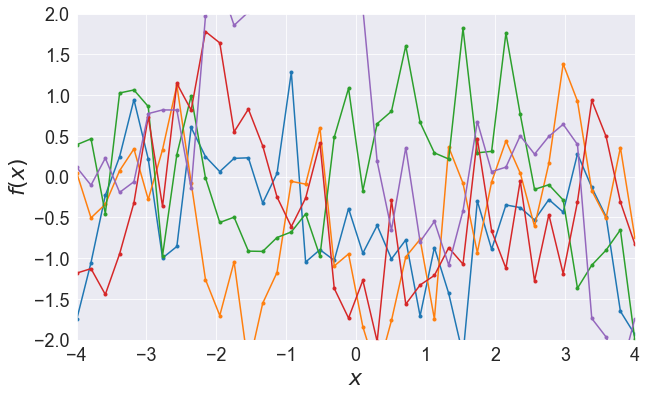

In [20]:
# Sample from the Gaussian process distribution
nb_of_samples = 40  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = gamma_exp(X, X,0.5,1)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Σ, 
    size=number_of_functions)

# Plot the sampled functions
plt.figure(figsize=(10, 6))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim([-4, 4])
plt.ylim([-2, 2])
plt.show()
#

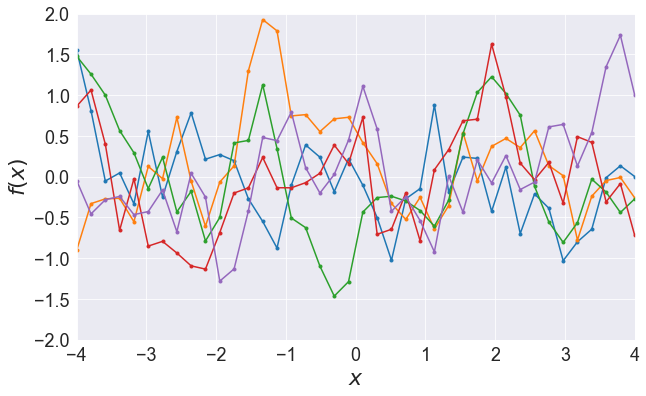

In [21]:
# Sample from the Gaussian process distribution
nb_of_samples = 40  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = gamma_exp(X, X,1.5,1)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Σ, 
    size=number_of_functions)

# Plot the sampled functions
plt.figure(figsize=(10, 6))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim([-4, 4])
plt.ylim([-2, 2])
plt.show()

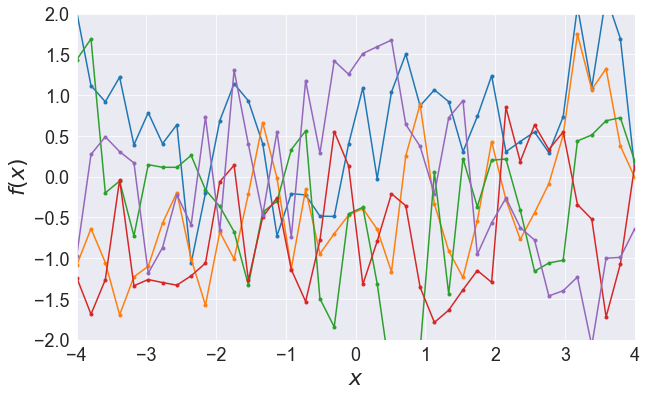

In [22]:
# Sample from the Gaussian process distribution
nb_of_samples = 40  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = gamma_exp(X, X,1.5,0.5)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Σ, 
    size=number_of_functions)

# Plot the sampled functions
plt.figure(figsize=(10, 6))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim([-4, 4])
plt.ylim([-2, 2])
plt.show()

In [23]:
#5 different function realizations at 40 points sampled from the Gaussian process prior using 0 mean and gamma-exp covarinace function with length scale = 1 and gamma = 1.

## Either GP or GP2 can be used

In [24]:
def GP(X1, y1, X2, kernel_func, l, var, sigma_y):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    #if kernel_func = exponentiated_quadratic:
    # Kernel of the observations
    Σ11_noise = kernel_func(X1, X1, l, var) + sigma_y**2 * np.eye(len(X1))
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2, l, var)
    # Solve
    Σ11_noise_inv = inv(Σ11_noise)
    # Compute posterior mean
    μ2 = (Σ12.T @ Σ11_noise_inv).dot(y1)
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2, l, var) + 1e-8 * np.eye(len(X2))
    Σ2 = Σ22 - (Σ12.T @ Σ11_noise_inv @ Σ12)
    return μ2, Σ2  # mean, covariance

In [25]:
def GP2(X1, y1, X2, kernel_func, l,sigma_y):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    #if kernel_func = exponentiated_quadratic:
    # Kernel of the observations
    Σ11_noise = kernel_func(X1, X1, l) + sigma_y**2 * np.eye(len(X1))
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2, l)
    # Solve
    Σ11_noise_inv = inv(Σ11_noise)
    # Compute posterior mean
    μ2 = (Σ12.T @ Σ11_noise_inv).dot(y1)
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2, l) + 1e-8 * np.eye(len(X2))
    Σ2 = Σ22 - (Σ12.T @ Σ11_noise_inv @ Σ12)
    return μ2, Σ2  # mean, covariance

In [30]:
# Compute the posterior mean and covariance

# Define the true function that we want to regress on
f_cos = lambda x: (np.cos(x)+x**2).flatten()

n1 = 40  # Number of points to condition on (training points)
n2 = 50  # Number of points in posterior (test points)
ny = 3  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

# Sample observations (X1, y1) on the function + Gaussian noise training points
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1,1))
sigma_y = 0.5
noise = np.random.normal(0,sigma_y,n1)
y1 = f_cos(X1) + noise 
# test points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1,1)
# Compute posterior mean and covariance
# First fitted model:
μ2, Σ2 = GP(X1, y1, X2, exponentiated_quadratic, 1.5, 1,sigma_y) #lengthscale=1.5 and variance=1
# Compute the standard deviation at the test points to be plotted
σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

# Second fitted model: matern 5/3
μ3, Σ3 = GP2(X1, y1, X2, matern_5, 1.5, sigma_y) #lengthscale=1.5
# Compute the standard deviation at the test points to be plotted
σ3 = np.sqrt(np.diag(Σ3))

# Draw some samples of the posterior
y3 = np.random.multivariate_normal(mean=μ3, cov=Σ3, size=ny)

# Third model : gamma_exp
μ4, Σ4 = GP2(X1, y1, X2, gamma_exp, 1.5, sigma_y) #lengthscale=1.5 
# Compute the standard deviation at the test points to be plotted
σ4 = np.sqrt(np.diag(Σ4))

# Draw some samples of the posterior
y4 = np.random.multivariate_normal(mean=μ4, cov=Σ4, size=ny) #gamma_exp

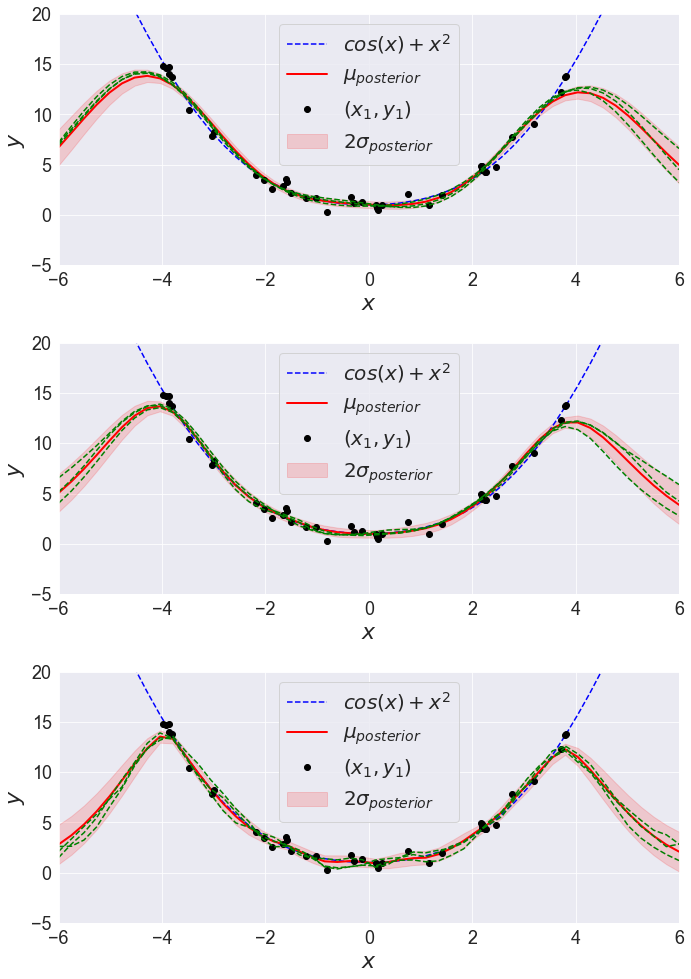

In [31]:
# Plot the postior distribution and some samples
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1, figsize=(10, 14))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_cos(X2), 'b--', label='$cos(x)+x^2$')
ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{posterior}$')
ax1.plot(X2, μ2, 'r-', lw=2, label='$\mu_{posterior}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
#ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -5, 20])
#ax1.set_ylim([-2, 10])
ax1.legend()

ax2.plot(X2, f_cos(X2), 'b--', label='$cos(x)+x^2$')
ax2.fill_between(X2.flat, μ3-2*σ3, μ3+2*σ3, color='red', 
                 alpha=0.15, label='$2 \sigma_{posterior}$')
ax2.plot(X2, μ3, 'r-', lw=2, label='$\mu_{posterior}$')
ax2.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
#ax2.set_title('Distribution of posterior and prior data.')
ax2.axis([domain[0], domain[1], -5, 20])
#ax1.set_ylim([-2, 10])
ax2.legend()

ax3.plot(X2, f_cos(X2), 'b--', label='$cos(x)+x^2$')
ax3.fill_between(X2.flat, μ4-2*σ4, μ4+2*σ4, color='red', 
                 alpha=0.15, label='$2 \sigma_{posterior}$')
ax3.plot(X2, μ4, 'r-', lw=2, label='$\mu_{posterior}$')
ax3.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
#ax3.set_title('Distribution of posterior and prior data.')
ax3.axis([domain[0], domain[1], -5, 20])
#ax1.set_ylim([-2, 10])
ax3.legend()

# # Plot some samples from this function
ax1.plot(X2, y2.T, 'g--')
ax2.plot(X2, y3.T, 'g--')
ax3.plot(X2, y4.T, 'g--')
plt.tight_layout()
plt.show()

In [21]:
#In the upper plot, the blue dashed line is the true function we used to generate the training data, which are depicted as the 10 black dots. We then use 75 evenly spaced test points from the same domain to form the posterior. The red curve is the mean function from the posterior and the pinky shaded area is the confidence interval, two standard deviation from the mean value at every test point. The lower plot is 5 function realizations sampled from the posterior distribution. 

Acknowledgements:
Some codes for plotting is modified from https://peterroelants.github.io/posts/gaussian-process-tutorial/ by Peter Roelants